In [2]:
from matchms.importing import load_from_msp
from matchms.plotting import plot_spectrum, plot_spectra_mirror
from matchms.similarity import CosineGreedy

import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Draw


In [3]:
alanine_rcx, alanine_golm_hr, alanine_golm_lr, alanine_qcxms = list(load_from_msp("../testdata/alanine_2TMS.msp"))

2024-06-05 13:29:19,559:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-06-05 13:29:19,560:WARNING:matchms:add_retention:None can't be converted to float.
2024-06-05 13:29:19,561:WARNING:matchms:add_retention:None can't be converted to float.


<Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>

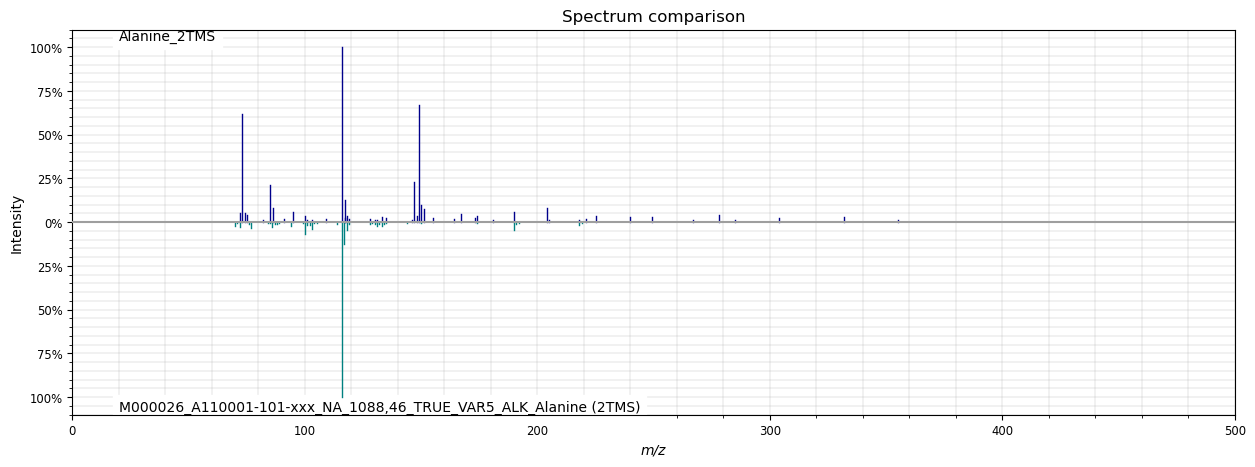

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_spectra_mirror(alanine_rcx, alanine_golm_lr)

<Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>

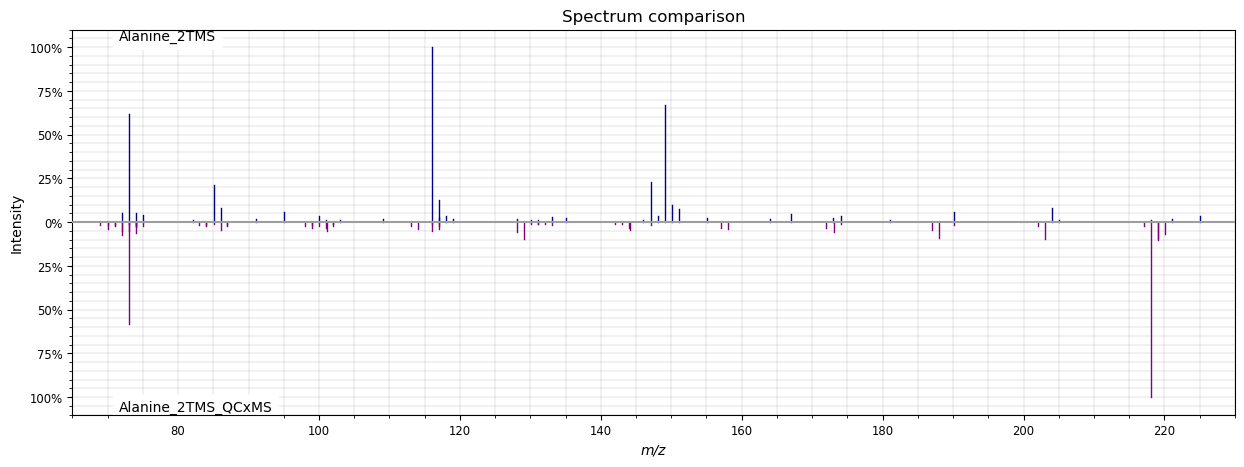

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_spectra_mirror(alanine_rcx, alanine_qcxms, color_bottom="purple", min_mz=65, max_mz=230)

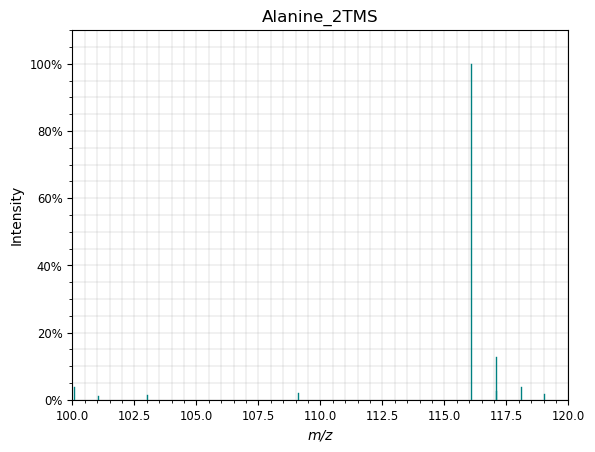

In [15]:
ax = plot_spectrum(alanine_rcx, min_mz=100, max_mz=120)

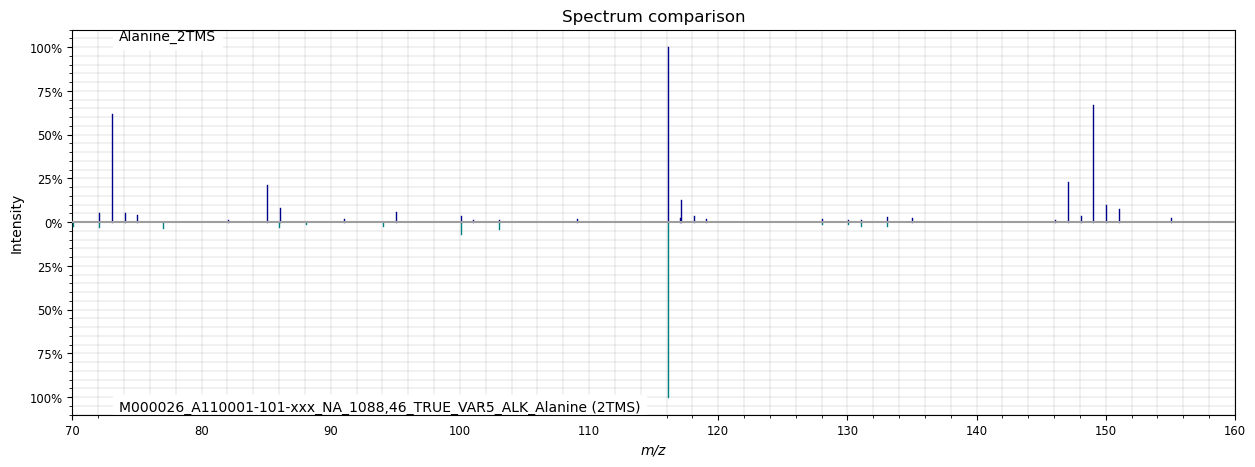

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_spectra_mirror(alanine_rcx, alanine_golm_hr, min_mz=70, max_mz=160)
score_hr = CosineGreedy(tolerance=0.0035).pair(alanine_rcx, alanine_golm_hr)
score_hr_ht = CosineGreedy(tolerance=0.5).pair(alanine_rcx, alanine_golm_hr)


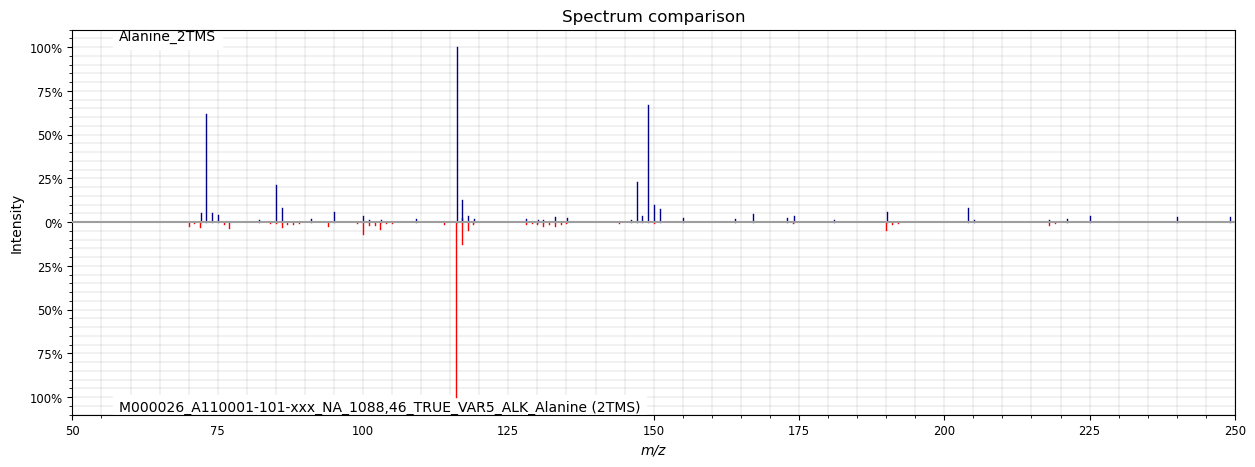

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_spectra_mirror(alanine_rcx, alanine_golm_lr, color_bottom="red", min_mz = 50, max_mz=250)
score_lr = CosineGreedy(tolerance=0.5).pair(alanine_rcx, alanine_golm_lr)
score_lr_lt = CosineGreedy(tolerance=0.0035).pair(alanine_rcx, alanine_golm_lr)


In [18]:
# matching substructures
mz100_smiles = "N(CC)[Si](C)C"
mz103_smiles = "O=CO[Si](C)C"
mz116_smiles = "N(CC)[Si](C)(C)C"
mz128_smiles = "O=CC(N[Si](C)C)C"
mz130_smiles = "O=CC(N[Si](C)C)C"
mz218_smiles = "O=C(O[Si](C)C)C(N[Si](C)(C)C)C"

matching_smiles = [mz100_smiles, mz103_smiles, mz116_smiles, mz128_smiles, mz130_smiles, mz218_smiles]

# not matching substructures
# 72, 77, 86, 88, 94, 103, 130, 131, 133, 190


In [19]:
matching_mols = [Chem.MolFromSmiles(smiles) for smiles in matching_smiles]

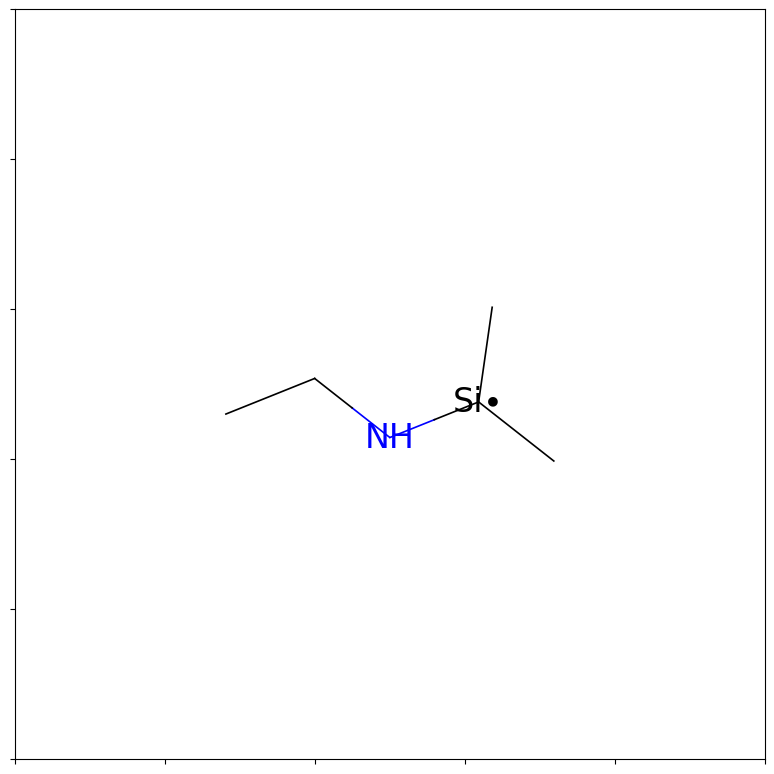

In [20]:
img = Draw.MolToMPL(matching_mols[0])